In [2]:
from top2vec import Top2Vec
from sklearn.datasets import fetch_20newsgroups

/opt/homebrew/Caskroom/miniforge/base/envs/webtopics/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 4 files to the new cache system


100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  5.85it/s]


In [3]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

model = Top2Vec(documents=newsgroups.data, speed="fast-learn", workers=6)

2023-01-15 16:14:01,811 - top2vec - INFO - Pre-processing documents for training
2023-01-15 16:14:05,823 - top2vec - INFO - Creating joint document/word embedding
2023-01-15 16:16:17,256 - top2vec - INFO - Creating lower dimension embedding of documents
2023-01-15 16:16:28,813 - top2vec - INFO - Finding dense areas of documents
2023-01-15 16:16:29,863 - top2vec - INFO - Finding topics


In [4]:
model.get_num_topics()

77

In [5]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [6]:
topic_sizes

array([1591, 1332,  780,  740,  734,  694,  688,  640,  581,  575,  446,
        446,  438,  410,  384,  357,  355,  347,  339,  330,  305,  301,
        300,  281,  259,  259,  234,  216,  191,  176,  171,  171,  157,
        153,  147,  146,  136,  136,  129,  121,  120,  120,  106,  104,
        104,  103,  100,  100,   95,   89,   87,   81,   81,   79,   76,
         75,   72,   72,   70,   70,   64,   63,   63,   62,   61,   61,
         58,   58,   54,   50,   45,   43,   37,   33,   33,   31,   30])

In [7]:
topic_nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76])

In [8]:
topic_words, word_scores, topic_nums = model.get_topics(77)

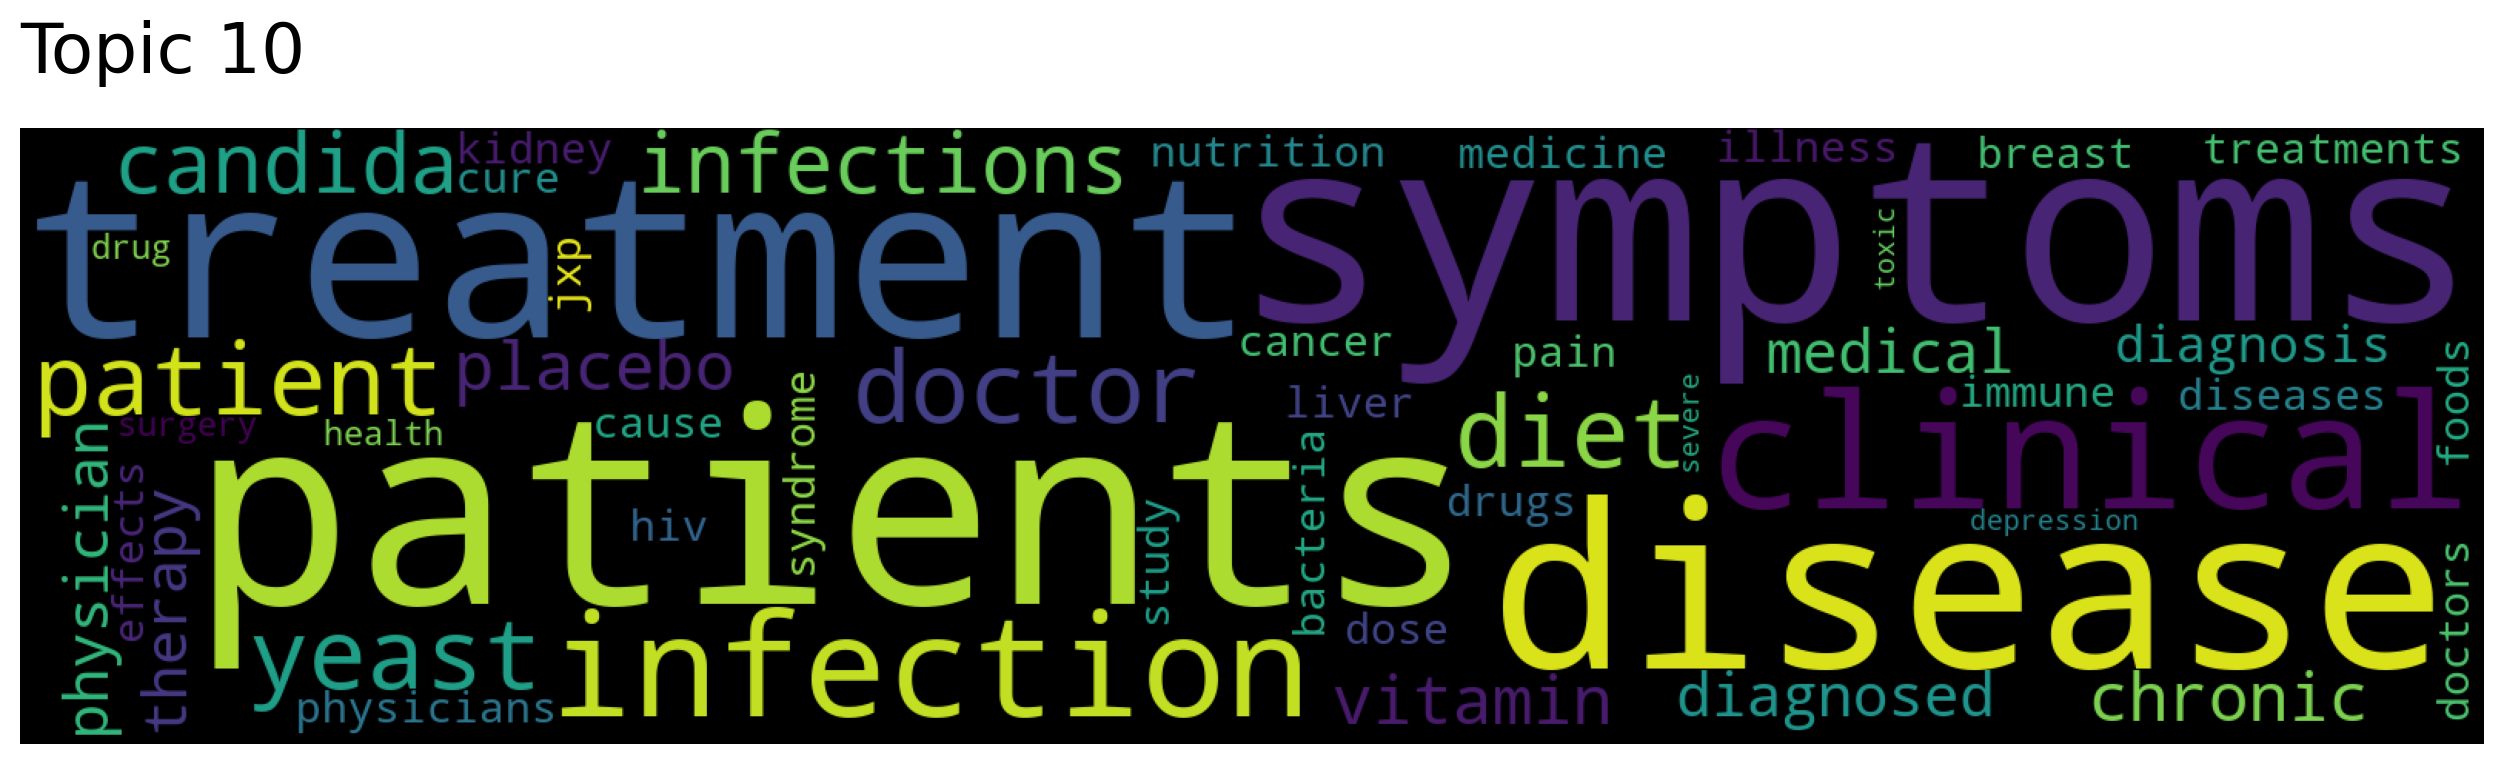

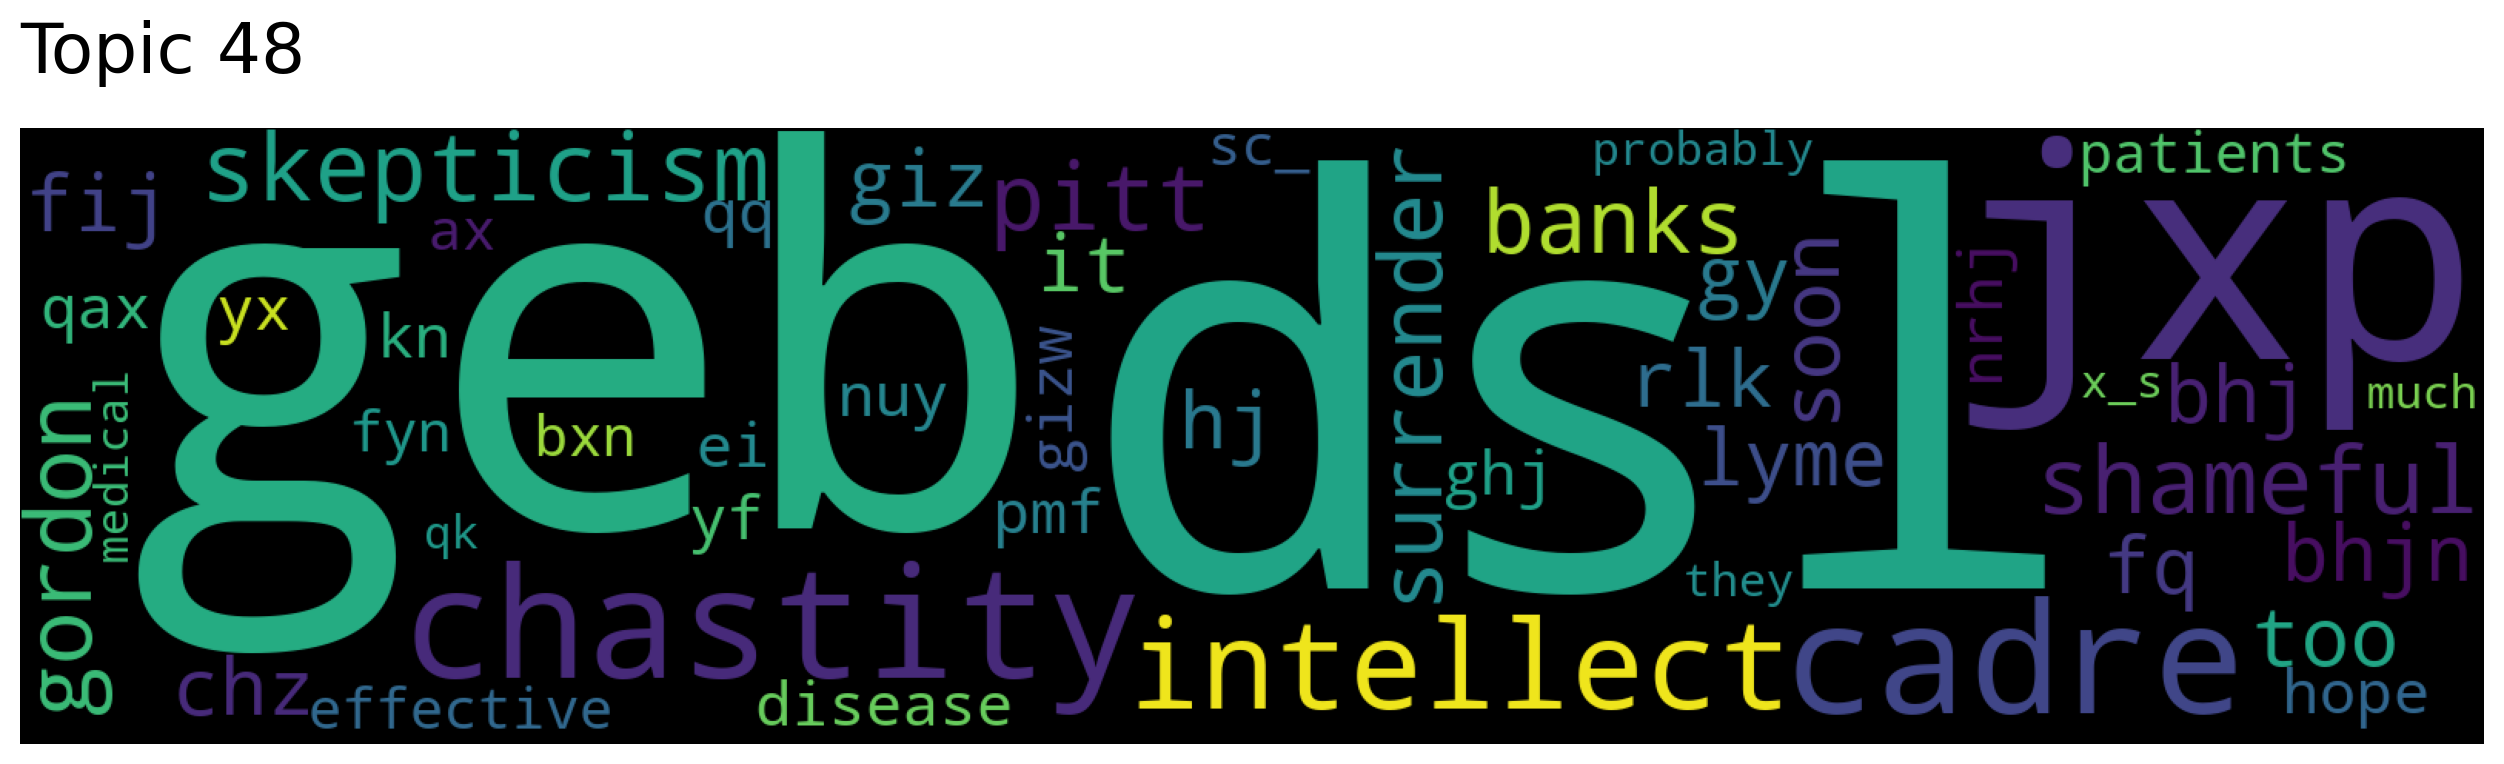

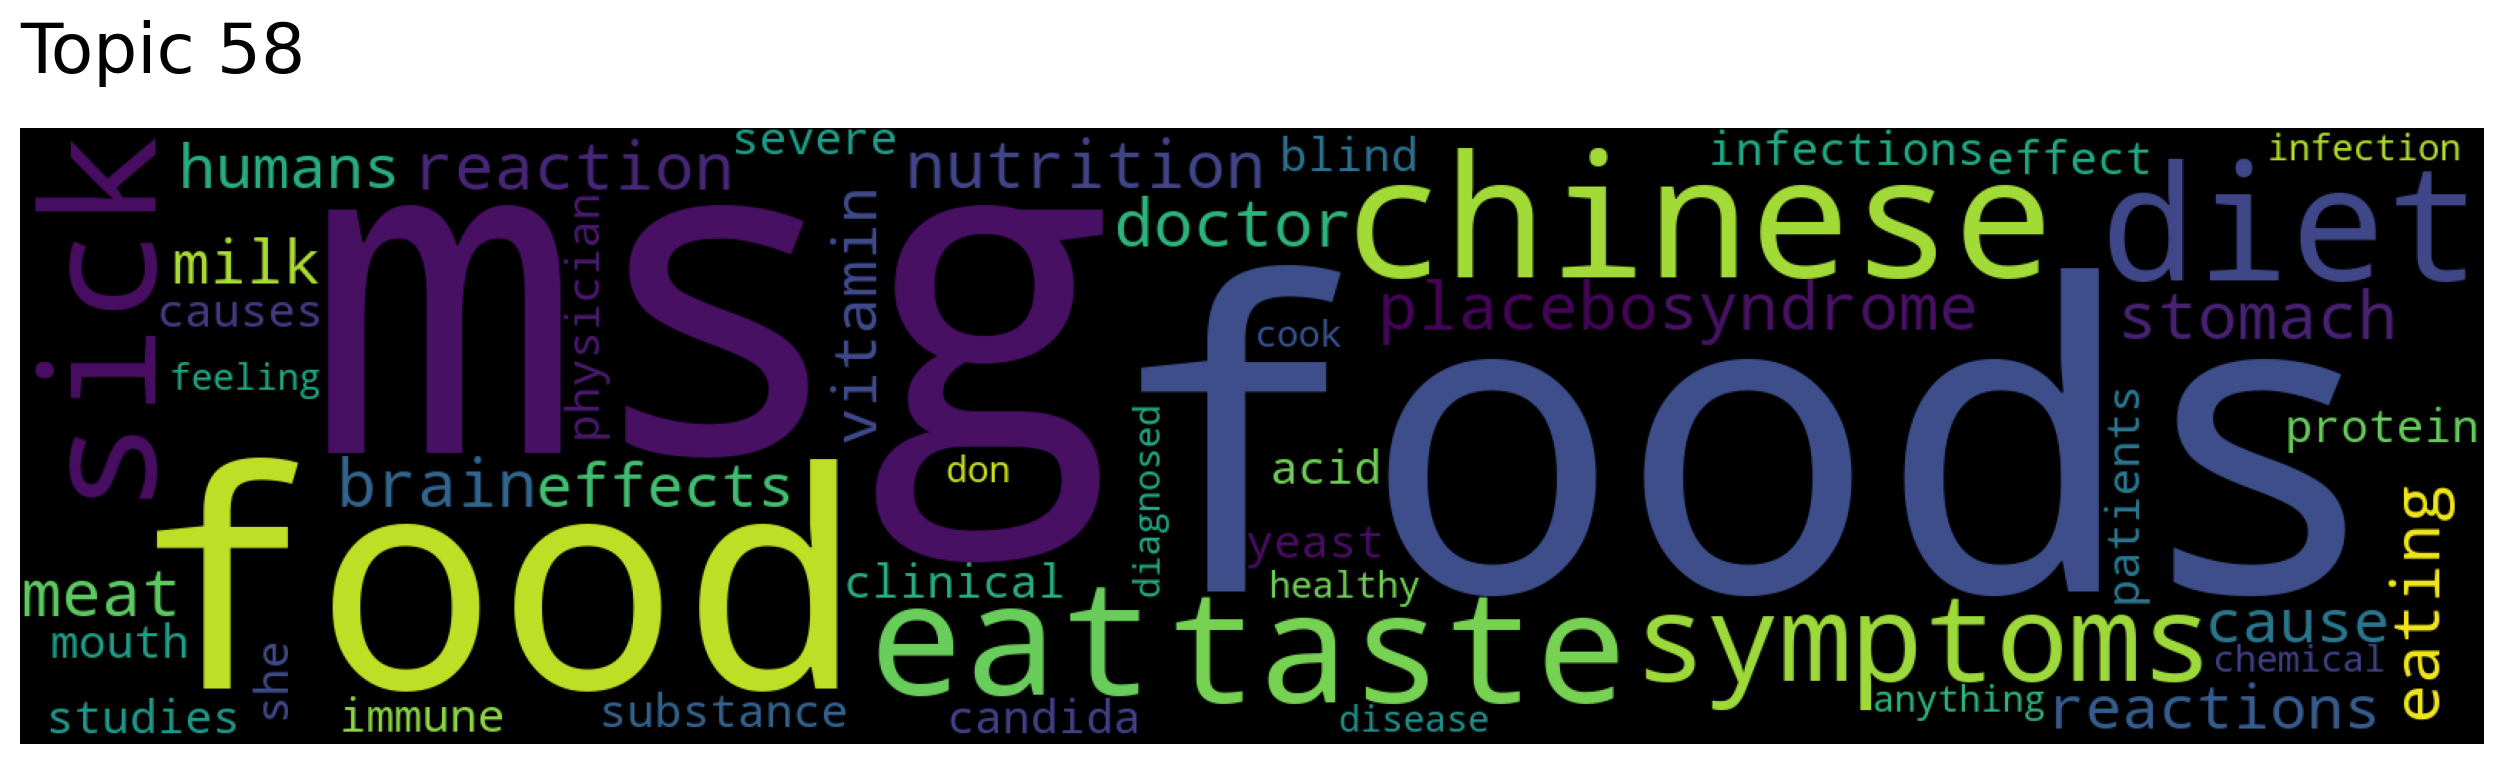

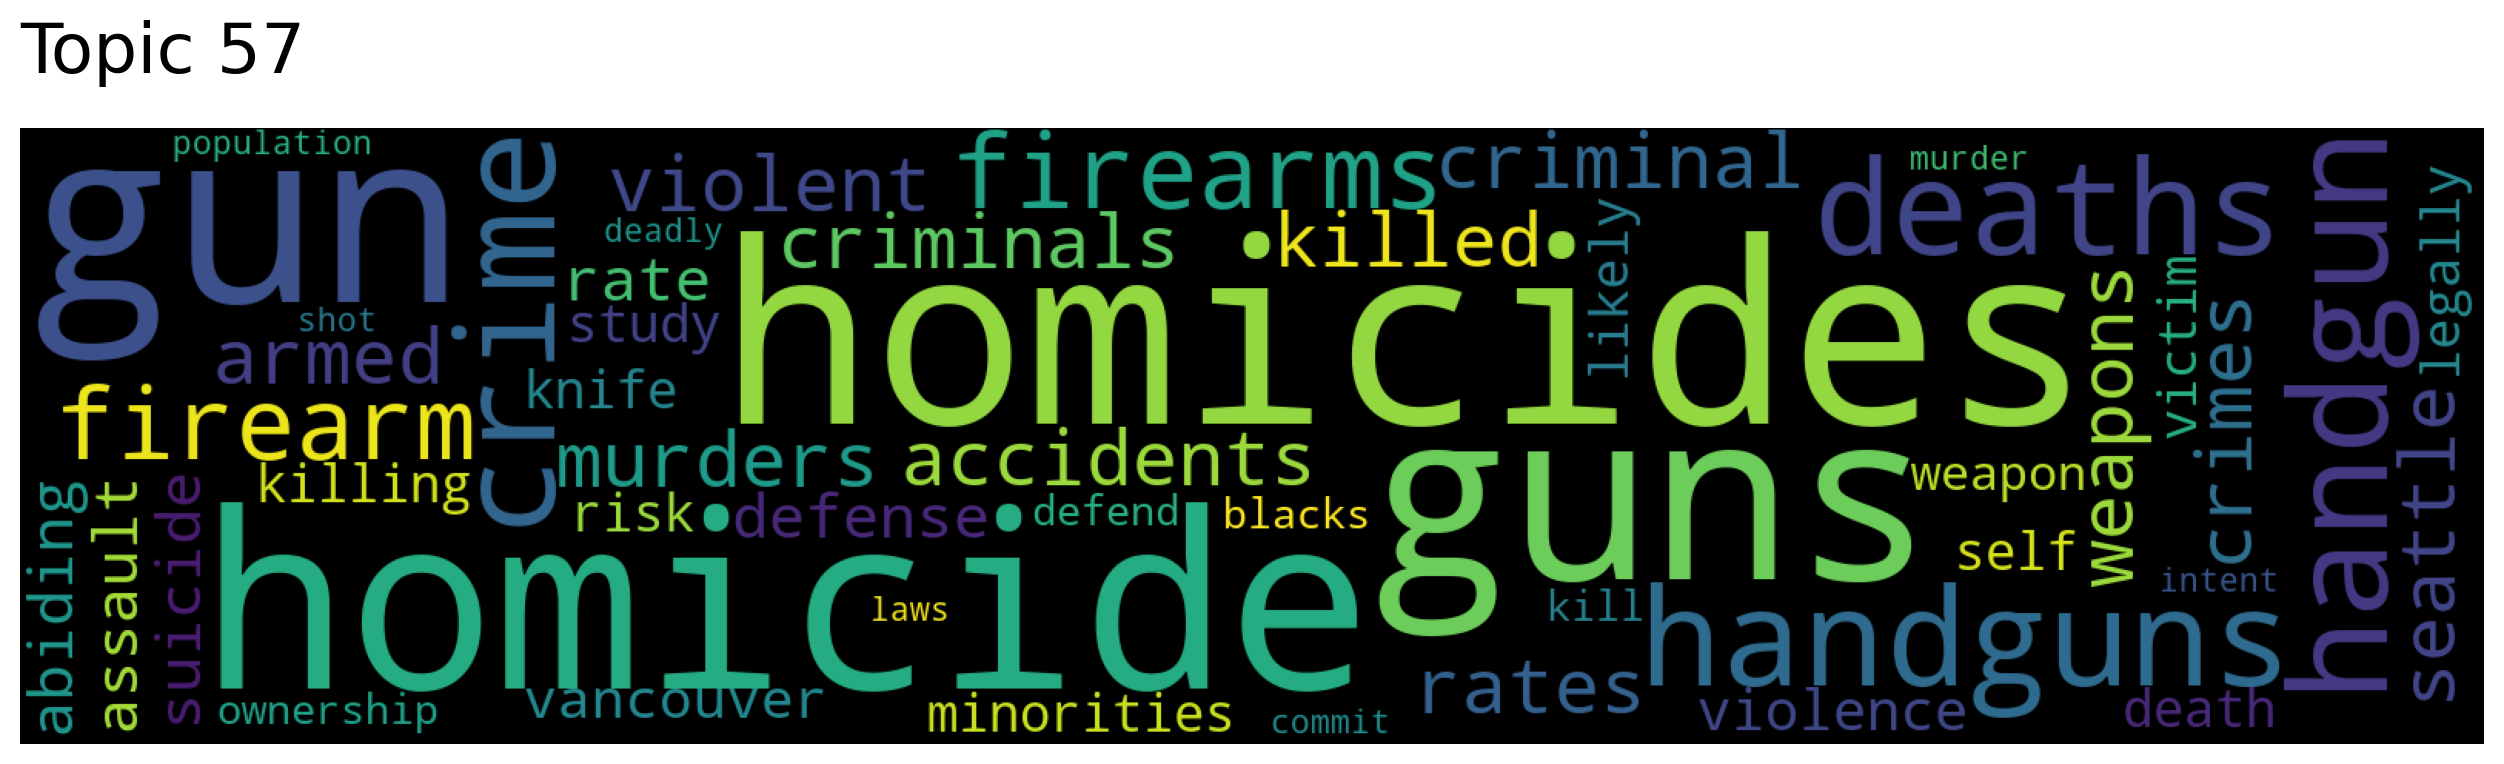

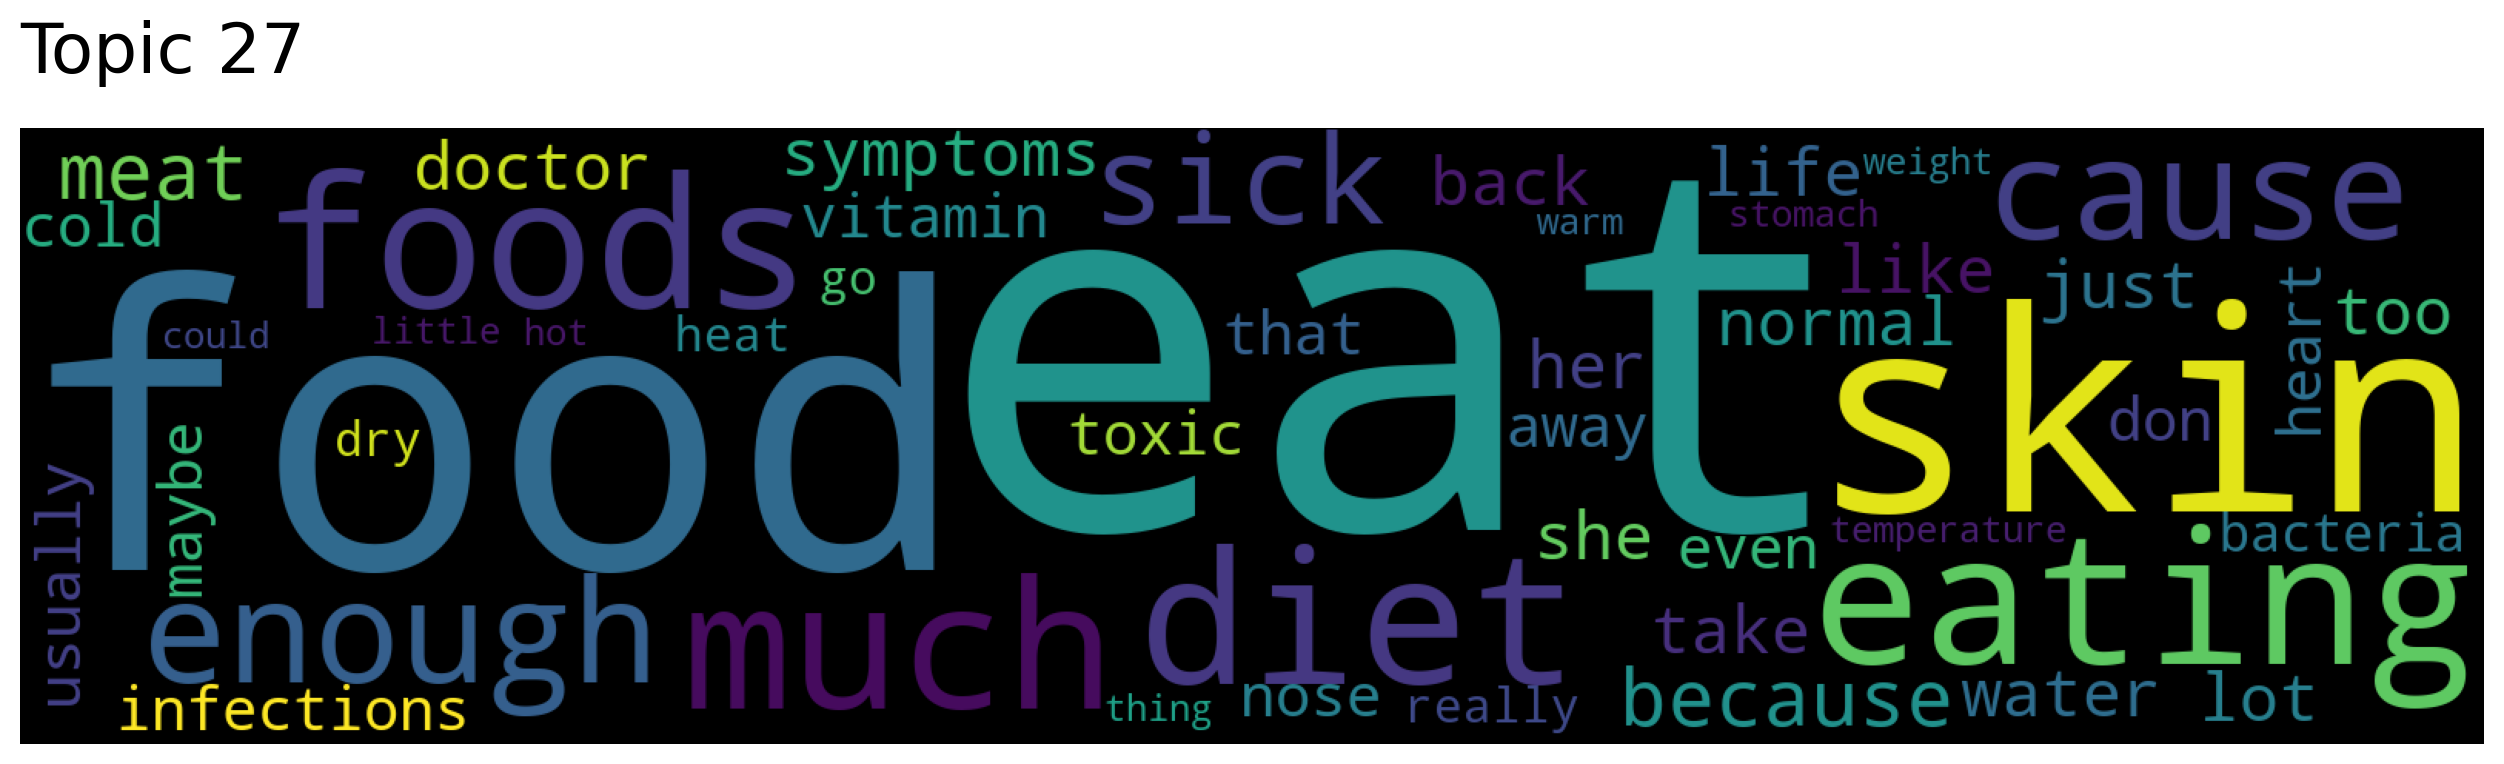

In [12]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["medicine"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [15]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=48, num_docs=5)

In [16]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=48, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 9496, Score: 0.9723886251449585
-----------

Senile keratoses.  Have nothing to do with the liver.


-- 
----------------------------------------------------------------------------
Gordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and
geb@cadre.dsl.pitt.edu   |  it is shameful to surrender it too soon." 
-----------

Document: 17988, Score: 0.9666054844856262
-----------

I'm not sure it is the fluctuation so much as the estrogen level.
Taking Premarin can certainly cause migraines in some women.

-- 
----------------------------------------------------------------------------
Gordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and
geb@cadre.dsl.pitt.edu   |  it is shameful to surrender it too soon." 
-----------

Document: 16797, Score: 0.966300904750824
-----------

It can suppress secretion of prolactin.  Is useful in cases of galactorrhea.
Some adenomas of the pituitary secret too much.

-- 
------------------------------------

In [17]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["cryptography", "privacy"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 16837, Score: 0.5855907797813416
-----------
Archive-name: net-privacy/part2
Last-modified: 1993/3/3
Version: 2.1


IDENTITY, PRIVACY, and ANONYMITY on the INTERNET

(c) 1993 L. Detweiler.  Not for commercial use except by permission
from author, otherwise may be freely copied.  Not to be altered. 
Please credit if quoted.

SUMMARY

Email and account privacy, anonymity, file encryption,  academic 
computer policies, relevant legislation and references, EFF, and 
other privacy and rights issues associated with use of the Internet
and global networks in general.

(Search for <#.#> for exact section. Search for '_' (underline) for
next section.)

PART 2
====== (this file)

Resources
---------

<4.1> What UNIX programs are related to privacy?
<4.2> How can I learn about or use cryptography?
<4.3> What is the cypherpunks mailing list?
<4.4> What are some privacy-related newsgroups?  FAQs?
<4.5> What is internet Privacy Enhanced Mail (PEM)?
<4.6> What are other Request For Comments

In [21]:
words, word_scores = model.similar_words(keywords=["space"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

nasa 0.6324789852093085
shuttle 0.5941819662169427
planetary 0.5544501523238228
orbit 0.5155694161503503
solar 0.510522638962271
exploration 0.5059560671007342
missions 0.5004976926282237
launch 0.4927210850167236
satellite 0.48353681618335387
available 0.47096681380471767
program 0.4655869800571972
earth 0.4605060994664595
mars 0.45711788026653366
orbital 0.45687028889924924
spacecraft 0.4503891682005028
mission 0.44361969193338174
satellites 0.4387696553324429
technology 0.4383073872304074
telescope 0.4382937374984929
development 0.437570289297294
